In [5]:
##Import packages and files
from itertools import compress, product
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator
import importlib
#import functions defining the layered landscape
from LayeredLandscapeFunctions import *
import networkx as nx


In [6]:
#Algorithm 2 Iterated Local Search (ILS)
#Require: Solution space S,
#Fitness function f(S),
#Neighborhood function N(S),
#Stopping threshold t
#1: Choose initial random solution s0 ∈ S
#2: s ← hillClimb(s0)
#3: i ← 0
#4: repeat
#5: s0 ← perturbation(s∗)
#6: s'0 ← hillClimb(s0)
#7: if (s∗''= s∗) ∧ (f(s∗0) > f(s∗)) then
#8: s∗ ← s∗''
#9: i ← 0
#10: end if
#11: i ← i + 1
#12: until i ≥ t
#13: return s∗

In [7]:
def Perturbation(Position,D):
    N=len(Position)
    s = list(range(N))
    random.shuffle(s)
       #Take a step by picking a random gene to change
    first_sample = s[-D:]
    for i in first_sample:
        Position[i] = abs(Position[i]-1)
    return(Position)

Position=[0,1,1,1,0,0]
Perturbation(Position,5)


[1, 0, 0, 0, 1, 0]

In [8]:
##There is a decision to be made about how to store the values
#I choose to create an L by L matrix where L is the total number of local optima
#the rows and columns of L are the fitness values of the Local Optima,
#each cell has an integer for the number of times, after a pertubation, a row 
#optima maps to a column optima
#a Seperate array stores the mapping of fitnesses of L to actual locations,
#this is done because it is extremely unlikely two local optima share a fitness

def Iterated_Local_Search(Landscape1, Landscape2, Landscape_Weights, M, D,t, NumSims):
    for Sim in range(NumSims):
        print('Sim is',Sim)

        if Sim==0:
            df = pd.DataFrame() #creates a new dataframe that's empty
        s0 = Position_rand(N)#1 random location
        s_star = Hill_Climb(s0,Landscape1, Landscape2, Landscape_Weights, M) #2, Hill Climb initial 
        f_s_star = Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, s_star)
        i=0 #set i equal to 0
        if f_s_star not in (df.index.values): #add a row if necessaru
                    df = df.append(pd.Series(name=(f_s_star)))
        df[f_s_star]=0
        while(i<t):
            df = df.fillna(0)

            s_prime = Perturbation(s_star, D)#perturb
            s_prime_star = Hill_Climb(s_star,Landscape1, Landscape2,Landscape_Weights,M)#climb new hill
            f_s_prime_star = Get_Fitness_Layered_Landscape(Landscape1, Landscape2, Landscape_Weights, s_prime_star)

            if f_s_star not in (df.index.values): #add a row if necessaru
                    df = df.append(pd.Series(name=(f_s_star)))
            if f_s_prime_star not in df.columns:                    #add column if necessary
                    df[f_s_prime_star]=0 #set to zero
                    df.at[f_s_star, f_s_prime_star] = 0
            if f_s_prime_star not in df.index.values:                    #add column if necessary
                    df = df.append(pd.Series(name=(f_s_prime_star)))



            #check for new maxima
            if ((s_prime_star!=s_star).any() and (f_s_prime_star > f_s_star)):
                #reset finteses
                i=0 ###IN ORIGNAL THIS IS NOT COMMENTED OUT
                df.at[f_s_star, f_s_prime_star] =  df.at[f_s_star, f_s_prime_star]+1 #add one to the value of the edge

                ##perhaps you should not reset if only new maxima since how else would you find new network clusters??
                #You are weighted by where you start and if it is a maxima then you stay there
                f_s_star = f_s_prime_star # set new f_s_star and s 

                s_star = s_prime_star

                #add i=i+1 since we allow change in optima (against paper) 
                #i = i + 1 ###NOT IN ORIGNINAL ALGORITHM 

            else:
                i = i + 1
                df.at[f_s_star, f_s_star] =  df.at[f_s_star, f_s_star]+1 #add one to the value of the edge for self loop


                ##BELOW UPDATES new location regardless if better contrary to paper
                #f_s_star = f_s_prime_star ####NOT IN ORIGNINAL ALGORITHM 

                #s_star = s_prime_star###NOT IN ORIGNINAL ALGORITHM 
    return(df)


In [29]:
##Functions for markov clustering

## Expansion Power
EXPANSION_POWER = 2
## Inflation power and number of iterations 
# iterations really should not be preset and should be coded as stopping at convergence)
INFLATION_POWER = 2
ITERATION_COUNT = 40
def normalize(matrix):
    return matrix/np.sum(matrix, axis=0)

def expand(matrix, power):
    return matrix**power

def inflate(matrix, power):
    for entry in np.nditer(matrix, op_flags=['readwrite']):
        #print(entry)
        entry[...] = entry**power
        #print(entry)
    return matrix

def run(matrix):
    #np.fill_diagonal(matrix, 1)
    #print(matrix)
    matrix = normalize(matrix)
    #print(matrix)
    for _ in range(ITERATION_COUNT):
        matrix = normalize(inflate(expand(matrix, EXPANSION_POWER), INFLATION_POWER))
    return matrix


In [30]:
N=10
K1=0
K2=5
M=1
D=2
t=100
NumSims=10
Landscape_Weights = [.6666,.3333]
(Landscape1, Landscape2) = Generate_Layered_Landscapes(N,K1,K2)
G = Iterated_Local_Search(Landscape1, Landscape2, Landscape_Weights, M, D,t,NumSims) #this is a pandas dataframe
#of the network with cells corresponding to number of times row maxima maps to column maxima

Sim is 0
Sim is 1
Sim is 2
Sim is 3
Sim is 4
Sim is 5
Sim is 6
Sim is 7
Sim is 8
Sim is 9


In [31]:
G

,0.535884,0.593137,0.564324,0.612012,0.606896,0.577654,0.594407,0.606998,0.504851,0.576656,0.531882,0.555384,0.541789,0.542976,0.579869,0.566869,0.541741,0.550115,0.567128,0.558243
0.535884,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.593137,0.0,2.0,0.0,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.564324,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.612012,0.0,0.0,0.0,500,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.606896,0.0,0.0,0.0,1,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.577654,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.594407,0.0,0.0,0.0,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.606998,0.0,0.0,0.0,1,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.504851,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0.576656,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [32]:
#Prepare data frame of network connections for markov clustering
Gnew = G.div(G.sum(axis=1), axis=0)

GTrans=Gnew.transpose()

GNumpy = GTrans.to_numpy()


In [33]:
MarkovMatrix = run(GNumpy)
#replace nan with 0
MarkovMatrix2 = np.nan_to_num(MarkovMatrix)
MarkovMatrix2.sum(axis=0)


array([0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0.])

In [34]:
##PLOT

MarkClsuMatrix = nx.from_numpy_matrix(MarkovMatrix2) #convert to adjacency matrix undirected

W = nx.DiGraph(MarkovMatrix2) #convert to directed graph (digraph)
OG = nx.DiGraph(G) #convert original probability graph to directed graph




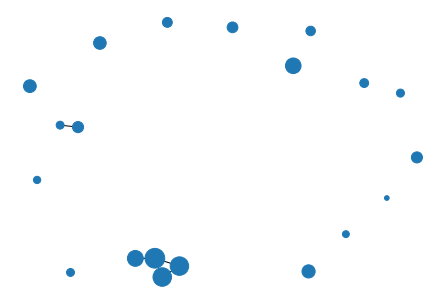

In [35]:
#set node size based upon some scaling of the fitness
node_sizes = (G.index.values**15)/sum(G.index.values**15)*3000
nx.draw(MarkClsuMatrix, node_size=node_sizes, labels=G.index.values,
        with_labels=False,arrows=True)




In [36]:
G.index.values/sum(G.index.values)*10000

array([473.8639275 , 524.4908512 , 499.01286801, 541.18161098,
       536.65721446, 510.79963813, 525.61404799, 536.74782184,
       446.42231721, 509.91695251, 470.32482147, 491.10708618,
       479.08573484, 480.13551764, 512.75810889, 501.26326383,
       479.04281846, 486.44806293, 501.49199751, 493.63533842])

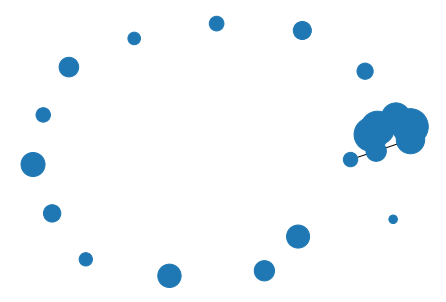

In [40]:
#set node size based upon some scaling of the fitness
node_sizes = (G.index.values**15)/sum(G.index.values**15)*10000
nx.draw(OG, node_size=node_sizes, labels=G.index.values,
        with_labels=False,arrows=False)




In [615]:
OG

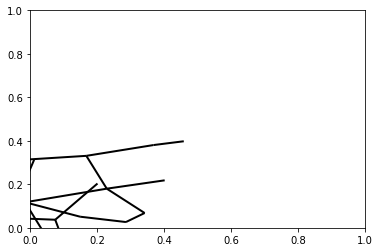

In [456]:
edges = nx.draw_networkx_edges(AdjMatrix, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, 
                               edge_cmap=plt.cm.Blues, width=2)

In [407]:
pos = nx.layout.spring_layout(AdjMatrix)


In [587]:
weights = [C[u][v]['weight'] for u,v in edges]


TypeError: 'LineCollection' object is not iterable

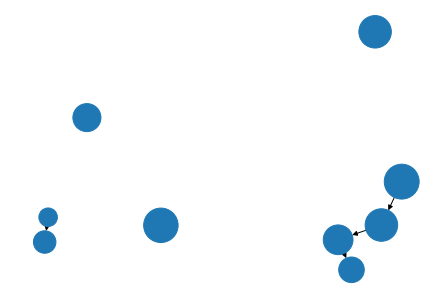

In [491]:
#set node size based upon some scaling of the fitness
node_sizes = (G.index.values)**10*30000
nx.draw(W, node_size=node_sizes,
        with_labels=False,arrows=True)
plt.show()


In [595]:
MarkovMatrix2

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.33333333, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.